載入檔案: shiangNum/zero_v4.npz
已應用 jitter 到 unit (std=30)


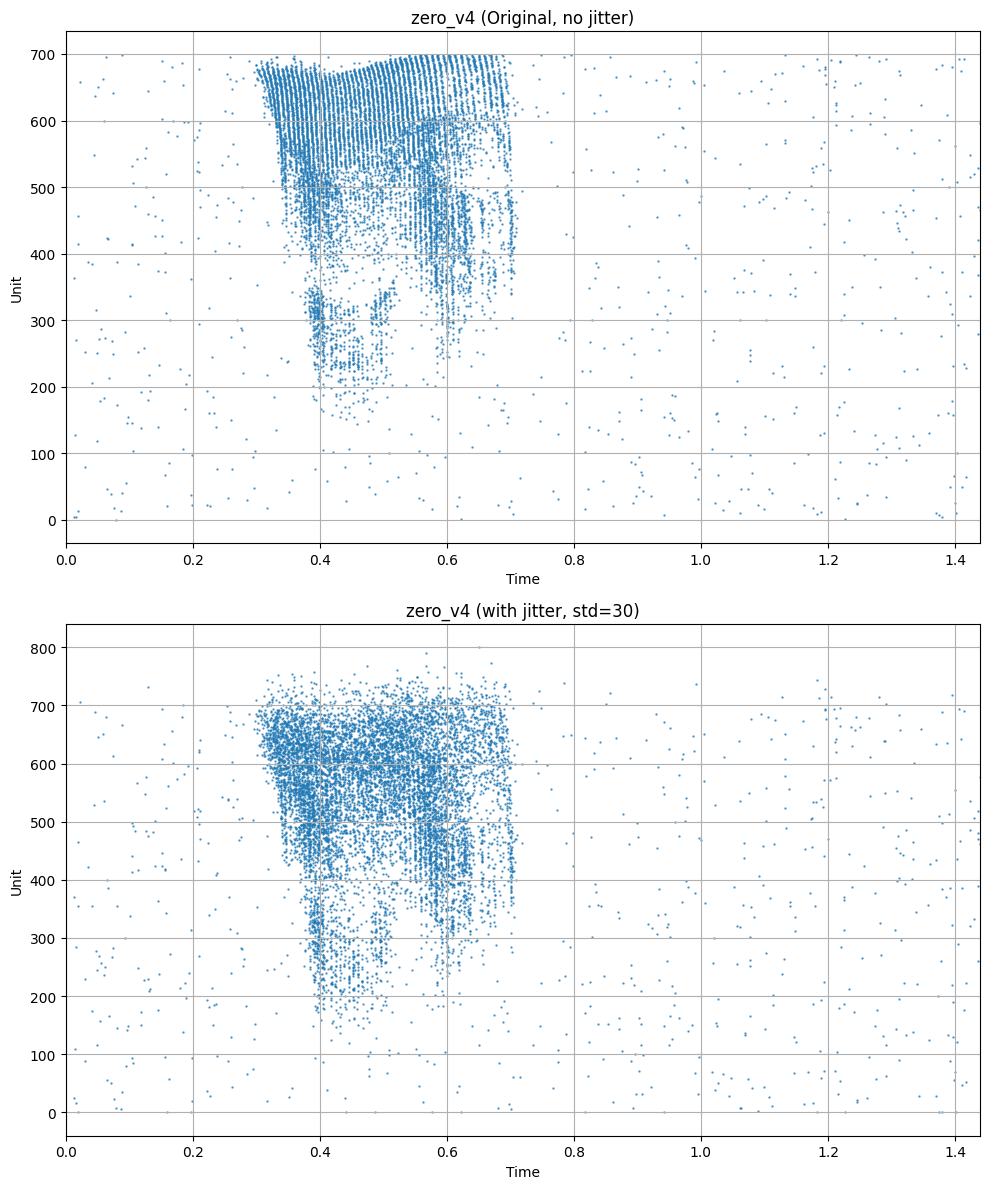

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os

def add_jitter_to_spikes(time_data, unit_data, jitter_std=1.0, seed=None):
    """
    對 spike 單位（unit）添加 jitter（抖動）
    
    參數:
        time_data: spike 時間陣列（保持不變）
        unit_data: spike 單位/神經元 ID 陣列
        jitter_std: jitter 的標準差（單位），預設為 1.0
        seed: 隨機種子，用於可重現性
    
    返回:
        time_data: 不變的時間陣列
        jittered_unit_data: 添加 jitter 後的單位陣列
    """
    if seed is not None:
        np.random.seed(seed)
    
    # 對每個 spike 單位添加高斯噪聲
    jitter = np.random.normal(0, jitter_std, size=len(unit_data))
    jittered_unit_data = unit_data + jitter
    
    # 確保單位不會變成負數（可選：也可以設定最小值為 0）
    jittered_unit_data = np.maximum(jittered_unit_data, 0)
    
    return time_data, jittered_unit_data

digit_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
#digit_names = [str(i) for i in range(10)]

# 選擇要顯示的數字索引 (0-9，例如：0=zero, 1=one, ..., 9=nine)
selected_digit = 0  # 修改這個數字來選擇不同的數字

# Jitter 參數設定
# 注意：論文未明確提供具體的 jitter 參數值
# 建議根據您的數據範圍來選擇：
# - 如果 unit 範圍較大（如 0-700），可嘗試 5-20
# - 如果 unit 範圍較小，可嘗試 1-5
# - 也可以設為 unit 範圍的 1-5% 作為相對值
use_jitter = True  # 是否使用 jitter
jitter_std = 30  # jitter 的標準差（單位），可調整此值來控制抖動幅度
jitter_seed = 77   # 隨機種子，設為 None 則每次隨機

if selected_digit < 0 or selected_digit >= len(digit_names):
    print(f"錯誤：請選擇 0-{len(digit_names)-1} 之間的數字")
else:
    name = digit_names[selected_digit]
    filename = f'{name}_v4' 
    spike_file = f'shiangNum/{filename}.npz'
    
    try:
        # Load data
        print(f"載入檔案: {spike_file}")
        data = np.load(spike_file, allow_pickle=True)
        
        if 'arr_0' in data:
            time_data = data['arr_0'][0]
            unit_data = data['arr_0'][1]
        else:
            print(f"警告：{filename} 沒有找到 'arr_0' 資料")
            time_data = []
            unit_data = []

        if len(time_data) > 0:
            max_time = np.max(time_data)
            
            # 創建對比圖：上邊是原始數據，下邊是添加 jitter 後的數據
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
            
            # 上圖：原始數據（沒有 jitter）
            ax1.scatter(time_data, unit_data, s=0.5, alpha=0.7)
            ax1.set_title(f'{filename} (Original, no jitter)')
            ax1.set_xlim(0, max_time)
            ax1.set_xlabel('Time')
            ax1.set_ylabel('Unit')
            ax1.grid(True)
            
            # 下圖：添加 jitter 後的數據
            if use_jitter:
                jittered_time_data, jittered_unit_data = add_jitter_to_spikes(
                    time_data, unit_data, jitter_std=jitter_std, seed=jitter_seed
                )
                print(f"已應用 jitter 到 unit (std={jitter_std})")
                ax2.scatter(jittered_time_data, jittered_unit_data, s=0.5, alpha=0.7)
                ax2.set_title(f'{filename} (with jitter, std={jitter_std})')
            else:
                ax2.scatter(time_data, unit_data, s=0.5, alpha=0.7)
                ax2.set_title(f'{filename} (no jitter)')
            
            ax2.set_xlim(0, max_time)
            ax2.set_xlabel('Time')
            ax2.set_ylabel('Unit')
            ax2.grid(True)
            
            plt.tight_layout()
            plt.show()
        else:
            max_time = 1
            # 創建單一圖表（當沒有數據時）
            fig, ax = plt.subplots(1, 1, figsize=(10, 6))
            ax.scatter(time_data, unit_data, s=0.5, alpha=0.7)
            ax.set_title(filename) 
            ax.set_xlim(0, max_time)
            ax.set_xlabel('Time')
            ax.set_ylabel('Unit')
            ax.grid(True)
            
            plt.tight_layout()
            plt.show()
        
        # 可選：儲存圖片
        # save_filename = f'{filename}_plot.png'
        # plt.savefig(save_filename, dpi=150, bbox_inches='tight')
        # print(f"圖片已儲存為: {save_filename}")

    except FileNotFoundError:
        print(f"錯誤：找不到檔案 {spike_file}")